In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
data = np.load("./datasets/mnist_train_small.npy")

In [3]:
data.shape

(19999, 785)

In [4]:
X = data[:, 1:]
y = data[:, 0]

In [7]:
y.shape, X.shape

((19999,), (19999, 784))

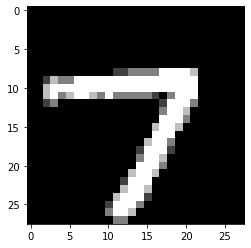

In [10]:
plt.imshow(X[30].reshape(28, 28), cmap='gray')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
class customKNN:
    
    def __init__(self, n_neighbours=5):
        
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        
        self.X = (X - X.mean())/ X.std() #Normalisation of Data
        self.y = y
        
    def predict_point(self, point):
        
        # take distance of this point from every point in training set (X) and compare with y
        # distance store karo, also store cluster value
        
        distances = []
        
        for Xd, yd in zip(self.X, self.y):
            
            distance = np.sum((Xd - point)**2)
            distances.append([distance, yd])
            
        top_k = sorted(distances)[:self.n_neighbours]
        ans, count = np.unique(np.array(top_k)[:, 1], return_counts=True)
        max_index = np.argmax(count)
        
        return ans[max_index]
    
    def predict(self, X):
        
        X = (X - X.mean()) / X.std()
        result = []
        
        for point in X:
            result.append(self.predict_point(point))
            
        return np.array(result)
    
    def score(self, X, y):
        
        return (self.predict(X) == y).mean()

In [65]:
model = customKNN(n_neighbours=10)

In [66]:
model.fit(X_train, y_train)

In [67]:
(model.X).shape

(13399, 784)

In [68]:
model.X

array([[-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151],
       [-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151],
       [-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151],
       ...,
       [-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151],
       [-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151],
       [-0.42412151, -0.42412151, -0.42412151, ..., -0.42412151,
        -0.42412151, -0.42412151]])

In [69]:
(model.y).shape

(13399,)

In [70]:
model.y

array([4, 0, 4, ..., 9, 9, 7], dtype=uint8)

In [71]:
model.predict(X_test[:1000])

array([1., 7., 0., 9., 4., 5., 4., 6., 9., 2., 0., 6., 1., 9., 9., 4., 9.,
       1., 6., 2., 7., 9., 9., 2., 4., 4., 5., 6., 0., 5., 9., 0., 8., 7.,
       9., 0., 2., 3., 8., 8., 3., 7., 0., 9., 8., 2., 7., 3., 7., 9., 1.,
       9., 0., 3., 9., 3., 2., 1., 0., 4., 5., 4., 9., 3., 6., 6., 0., 9.,
       7., 0., 6., 0., 3., 2., 3., 4., 9., 5., 5., 4., 1., 6., 0., 2., 6.,
       0., 5., 3., 3., 1., 8., 0., 6., 9., 5., 9., 2., 0., 3., 1., 6., 9.,
       2., 5., 4., 6., 7., 4., 1., 4., 1., 2., 0., 5., 4., 7., 3., 7., 1.,
       6., 1., 1., 6., 6., 8., 6., 7., 2., 6., 2., 4., 2., 6., 2., 8., 5.,
       9., 1., 8., 7., 4., 4., 0., 6., 2., 7., 4., 4., 1., 9., 7., 9., 7.,
       5., 7., 6., 7., 2., 1., 5., 2., 3., 2., 3., 1., 8., 9., 0., 4., 6.,
       5., 8., 4., 5., 8., 9., 4., 9., 5., 7., 0., 0., 1., 3., 2., 1., 9.,
       5., 1., 0., 1., 8., 1., 1., 2., 5., 0., 3., 0., 2., 1., 6., 0., 1.,
       1., 6., 7., 5., 8., 9., 1., 9., 3., 6., 1., 0., 0., 1., 2., 2., 7.,
       0., 3., 3., 3., 1.

In [72]:
y_test[:1000]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9, 4, 9, 1, 6, 2, 7, 9,
       4, 2, 4, 4, 5, 6, 0, 8, 9, 0, 8, 7, 9, 0, 2, 3, 8, 8, 3, 7, 0, 9,
       8, 2, 7, 3, 7, 9, 1, 9, 8, 3, 9, 3, 2, 1, 0, 4, 5, 4, 9, 3, 6, 2,
       0, 9, 7, 0, 6, 0, 3, 2, 3, 4, 9, 5, 5, 4, 1, 6, 0, 2, 6, 0, 5, 8,
       3, 1, 8, 0, 6, 9, 5, 9, 2, 0, 3, 1, 6, 9, 2, 5, 4, 6, 7, 4, 1, 4,
       1, 2, 0, 5, 4, 7, 3, 7, 3, 6, 1, 1, 6, 4, 8, 6, 7, 2, 6, 2, 4, 2,
       6, 2, 8, 5, 9, 1, 8, 7, 4, 4, 0, 6, 2, 7, 4, 4, 1, 9, 7, 9, 7, 5,
       7, 6, 8, 2, 7, 5, 2, 3, 2, 3, 1, 8, 9, 0, 4, 6, 5, 8, 4, 5, 8, 9,
       4, 9, 5, 3, 0, 0, 1, 3, 2, 1, 9, 5, 1, 6, 1, 8, 1, 1, 2, 5, 2, 9,
       0, 3, 1, 6, 0, 1, 1, 6, 7, 5, 8, 9, 1, 9, 3, 6, 4, 0, 0, 1, 2, 2,
       7, 0, 3, 3, 3, 1, 6, 9, 5, 5, 6, 9, 7, 0, 7, 1, 5, 7, 3, 2, 2, 6,
       0, 5, 4, 4, 8, 8, 0, 7, 1, 9, 7, 9, 3, 7, 9, 0, 2, 2, 6, 3, 1, 8,
       6, 2, 9, 3, 8, 0, 7, 3, 5, 7, 8, 5, 0, 1, 3, 9, 5, 0, 2, 7, 4, 8,
       1, 8, 3, 4, 3, 9, 1, 3, 7, 1, 4, 3, 6, 9, 2,

In [73]:
model.score(X_test[:1000], y_test[:1000])

0.946

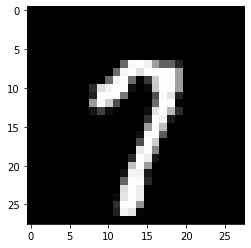

In [74]:
plt.imshow(X_test[1].reshape(28, 28), cmap='gray')

In [75]:
a = np.array([0,1,1,1,1,1,1,1,1,0,0, 2,2, 2, 2, 2])
ans, counts = np.unique(a, return_counts=True)
print(ans, counts)
np.argmax(counts)

[0 1 2] [3 8 5]


1